#  Employee Attrition Machine Learning Model

### Using Machine Learning to Predict Employee Attrition: A People Analytics Solution

This model provides organisations with a proactive approach to understanding and addressing employee turnover. By predicting the likelihood of attrition based on various factors (such as job satisfaction, workload, tenure, and manager support), it enables targeted interventions that can save costs and improve employee engagement. Key applications include:

1. **Identifying At-Risk Employees:** The model can flag employees who are at higher risk of leaving, allowing HR teams to take early, tailored actions to address their concerns and retain valuable talent.
2. **Optimising Retention Strategies:** By analysing the drivers of attrition, organisations can design evidence-based retention strategies, such as improving career development opportunities, revising workloads, or enhancing leadership support.
3. **Strategic Workforce Planning:** Predicting turnover enables better planning for recruitment and succession, helping organisations ensure critical roles are filled without disruptions to operations.
4. **Reducing Recruitment Costs:** By retaining more employees, organisations can lower the costs associated with recruiting, onboarding, and training new hires.
5. **Enhancing Employee Well-being:** Understanding why employees leave can lead to broader organisational changes that improve workplace culture and well-being, boosting overall engagement and performance.

The model leverages historical data to uncover patterns that human analysis might miss, offering actionable insights. While it’s not a replacement for human intuition, it empowers HR professionals and leaders to make smarter, more strategic decisions with data as their foundation.

### Executive Summary

A RandomForestClassifier was trained on the data, achieving an accuracy of approximately 89%. A grid search was then conducted to identify the best hyperparameters for the model. However, after applying the optimised hyperparameters, the change in accuracy was minimal, with a slight decrease. Overall, the model performs well in predicting "No Attrition" (~True negatives = 255, False positives = 0), however, it struggles with predicting "Yes Attrition" (True positives = 4, False Negatives = 35).

Weaknesses of the model:
- Categorical variables were LabelEncoded despite being nominal. One-hot encoding these varaibales given their non-ordered nature would be most appropriate.

In [17]:
# Pre-processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning- Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [18]:
df = pd.read_csv("/Users/lukecarroll/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Checking for missing data and getting a high-level view of the data composition.

In [19]:
df.isnull().sum()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Visulisation
Visual inspection of the data will be conducted to identify any abnormalities in the dataset. This will also be used to gather an understanding of the data, including patterns and preliminary analysis of relationships between varaibles.

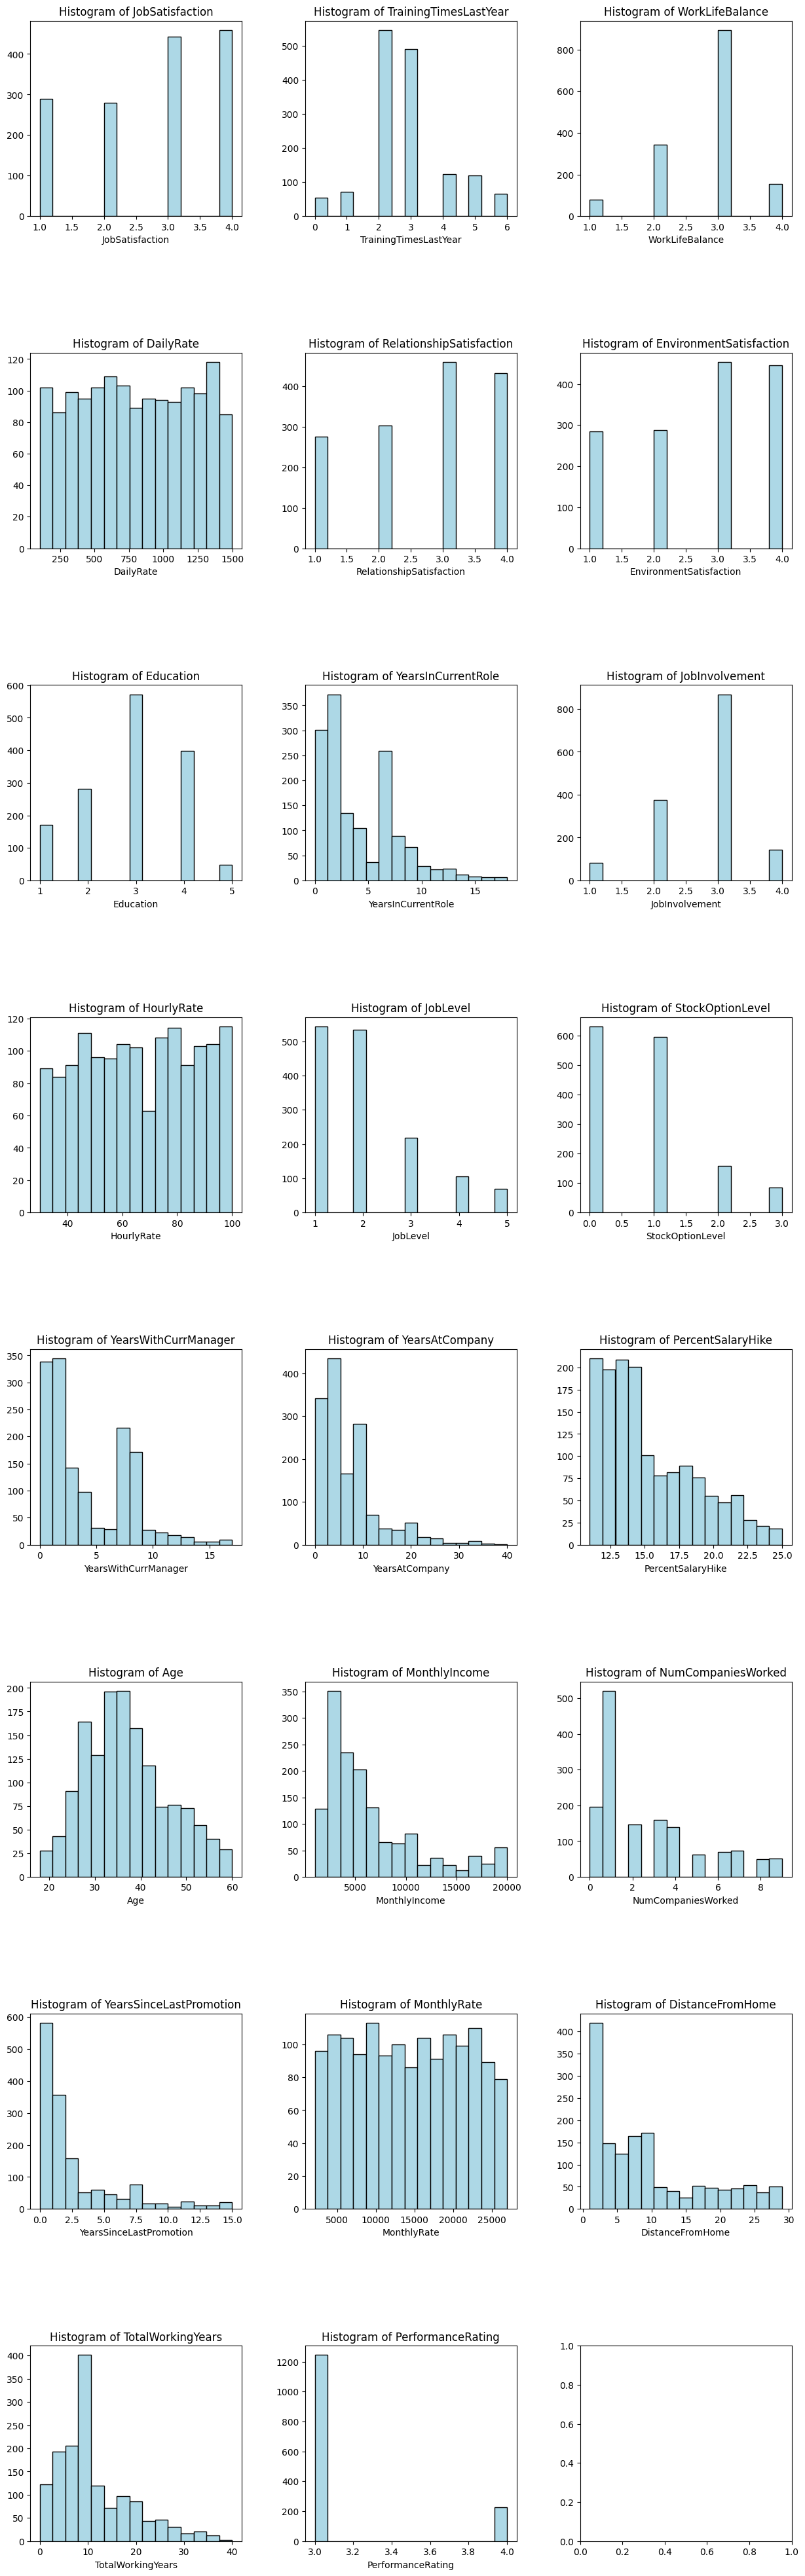

In [20]:
df = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
columns_to_plot = list(set(df.columns).difference(categorical_columns))

fig, axes = plt.subplots(round(len(list(columns_to_plot))/3 + 0.4), 3, figsize=(15, 50)) 
axes = axes.flatten()  

for idx, column in enumerate(columns_to_plot):
    axes[idx].hist(df[column], bins=15, color='lightblue', edgecolor='black')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlabel(column) 

plt.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()

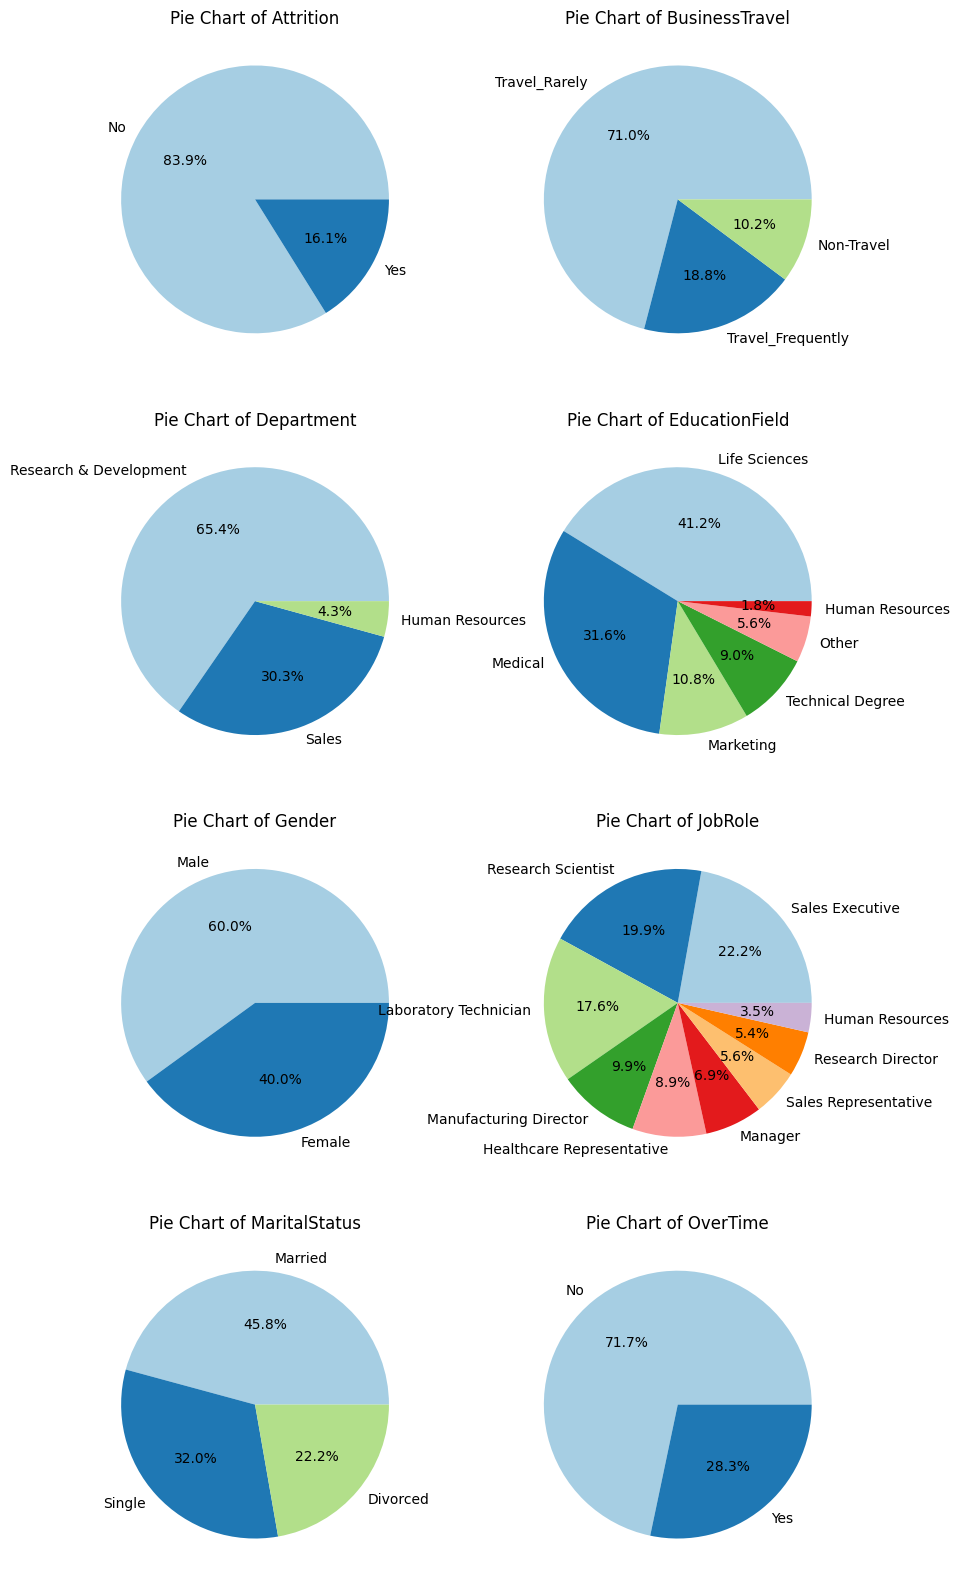

In [21]:
fig, axes = plt.subplots(round(len(categorical_columns)/2 + 0.4), 2, figsize=(10, 20))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    values = df[column].value_counts()
    
    axes[idx].pie(values, labels=values.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    axes[idx].set_title(f'Pie Chart of {column}')

plt.subplots_adjust() # wspace=0.7, wspace=0.3
plt.show()

One-hot encoding the attrition variable and label encoding the categorical varaibles.

In [22]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


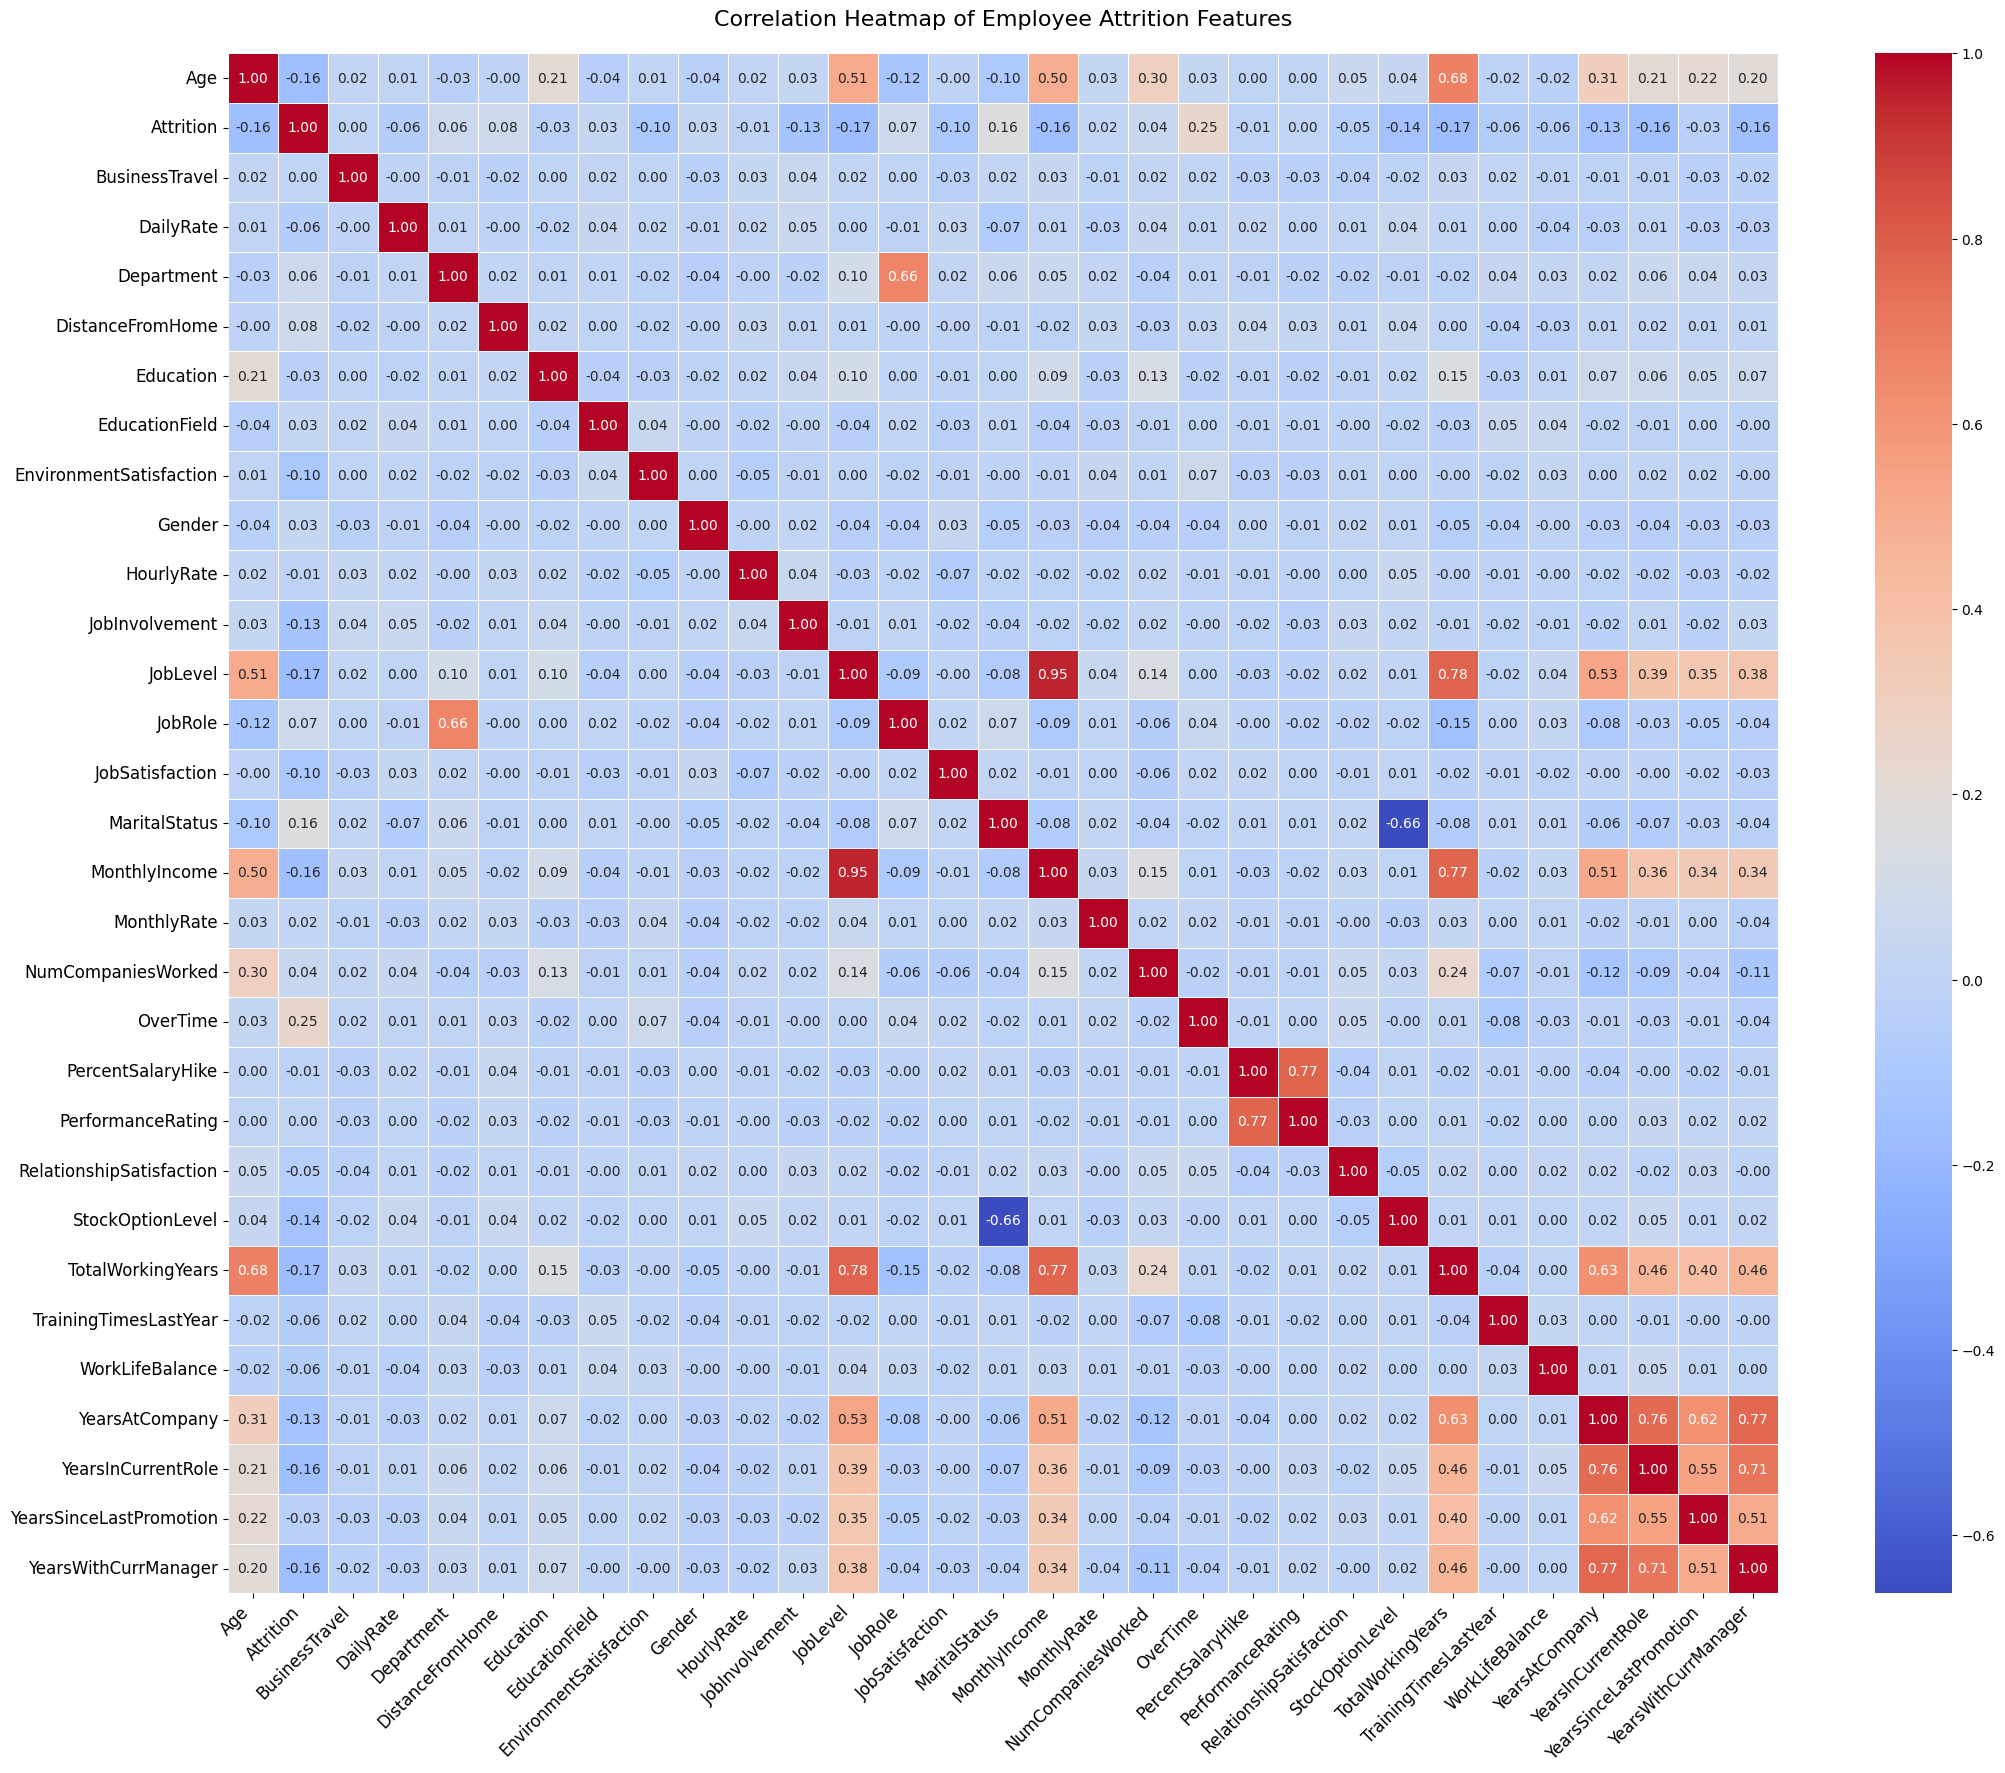

In [23]:
plt.figure(figsize=(25, 20))  
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, 
            linewidths=0.5)

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(rotation=0, fontsize=12)  

plt.title('Correlation Heatmap of Employee Attrition Features', fontsize=16, pad=20)

plt.show()

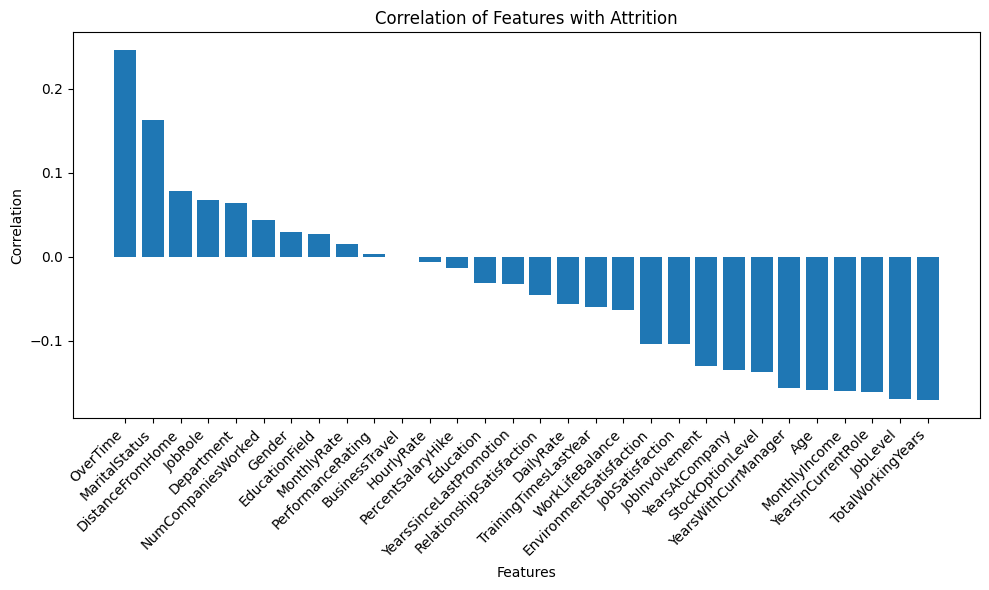

In [24]:
corrs = df.corr()['Attrition'].sort_values(ascending=False).drop('Attrition')

plt.figure(figsize=(10, 6)) 
plt.bar(corrs.keys(), corrs.values)

plt.title('Correlation of Features with Attrition')
plt.xlabel('Features')
plt.ylabel('Correlation')

plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

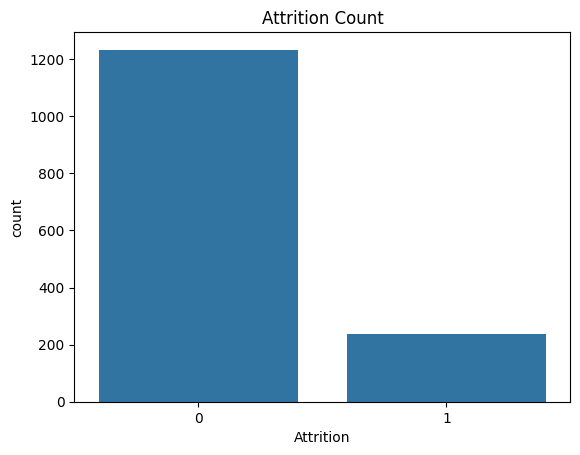

Attrition Rate:
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [25]:
sns.countplot(x='Attrition', data=df )
plt.title('Attrition Count')
plt.show()

attrition_rate = df['Attrition'].value_counts(normalize=True)
print(f"Attrition Rate:\n{attrition_rate}")


# Model Training: RandomForestClassifier

In this section, we will train the model using the `RandomForestClassifier`. This algorithm is well-suited for classification tasks, providing robust performance and handling of both numerical and categorical data.


In [30]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# X = df.drop('Attrition', axis=1)  # Features
# y = df['Attrition']  # Target (Attrition)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# smote = SMOTE(random_state=42)

# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# df_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
# df_train_resampled['Attrition'] = y_train_resampled

# print("New class distribution after SMOTE:")
# print(df_train_resampled['Attrition'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # Standardise the features (especially important for a logistic regression)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8809523809523809
Confusion Matrix:
 [[254   1]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



The model performs well in predicting "No Attrition" (~True negatives = 255, False positives = 0), however, it struggles with predicting "Yes Attrition" (True positives = 4, False Negatives = 35).

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters found by GridSearchCV:", best_params)

Best Parameters found by GridSearchCV: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [32]:
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

rf_best.fit(X_train_scaled, y_train)

y_pred_best = rf_best.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8707
Confusion Matrix:
 [[252   3]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



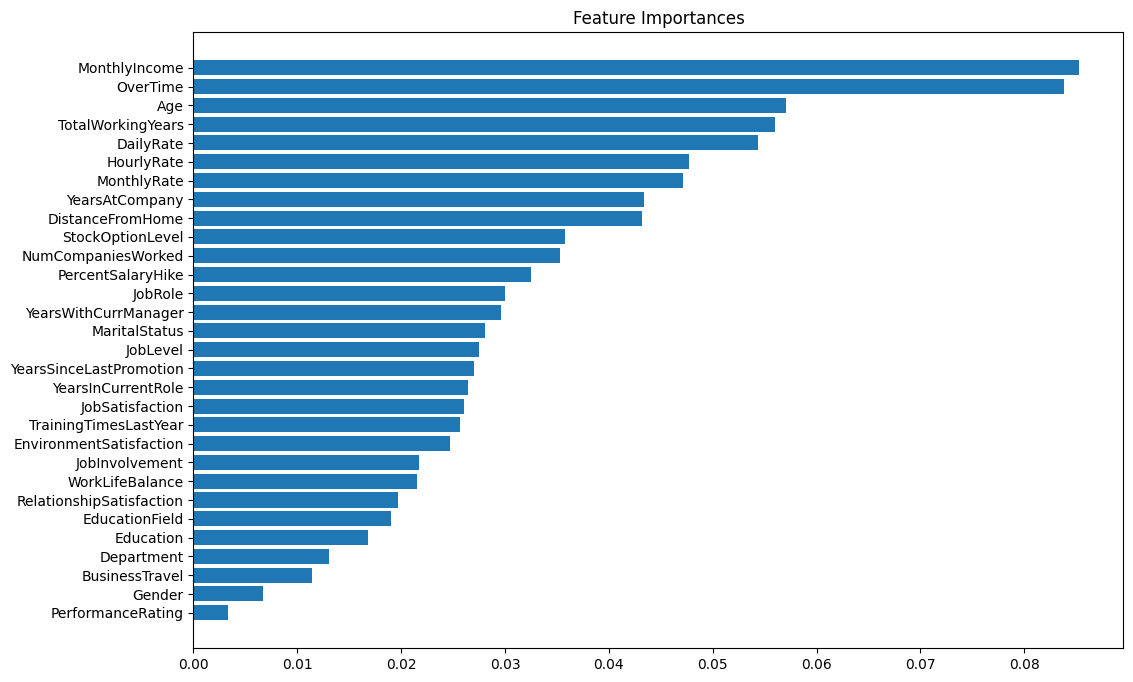

In [33]:
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.show()
